In [ ]:
!pip install matplotlib==3.3.3

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import cv2

In [3]:
cv2.__version__ , mlt.__version__

('4.1.2', '3.2.2')

In [4]:
from google.colab.patches import cv2_imshow

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path_datasets = r"/content/drive/MyDrive/graduation project (ML)/datasets/images_processing/"

In [8]:
img_h, img_w, img_ch = 150, 300, 1   
image_shape = (img_h, img_w, img_ch) 
image_shape

(150, 300, 1)

In [9]:
kernel = np.ones((9,9),np.uint8) # default   

def preprocessor_img(path, image_shape):

  image = cv2.imread(path,0)   # read in a grey scale
  cv2_imshow(image)         # show
  print("="*50)  #print endline

  blured = cv2.GaussianBlur(image, (9,9), 0)    #  Remove noise by gaussian bluring
  cv2_imshow(blured)    # show
  print("="*50) # endline

  threshold, binary = cv2.threshold(blured, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # binarizaton (black and white) 
  print("threshold: ",threshold)   # value
  cv2_imshow(binary)   # show
  print("="*50)  # endline

  closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=10)    # Closing the area (segmentation)
  cv2_imshow(closing)      #show
  print("="*50)  #print

  contours, hierarchies = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  #Finding contour
  print("numbers of contours: ", len(contours))   
  contour_image = image.copy()      # clone and edit 
  the_biggest_contour_by_area = max(contours, key=cv2.contourArea)    # get max contour area 
  cv2.drawContours(contour_image, [the_biggest_contour_by_area], -1, (0,255,255), 2)  # draw to detect 
  cv2_imshow(contour_image)
  print("="*50)


  Rect_image = image.copy()      # clone to edit 
  x,y,w,h = cv2.boundingRect(the_biggest_contour_by_area)   
  cv2.rectangle(Rect_image, (x, y), (x+w, y+h), (0,255,255), 3)    # draw rectanagle
  cv2_imshow(Rect_image)
  print("="*50)

  cropped = image[y:y+h, x:x+w]   
  cv2_imshow(cropped)
  print("="*50)

  resized = cv2.resize(cropped, (img_w,img_h), interpolation=cv2.INTER_LANCZOS4)
  print(resized.shape)
  cv2_imshow(resized)
  print("="*50)

  # resized_blured = cv2.GaussianBlur(resized, (9,9), 0)

  threshold, resized_binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  cv2_imshow(resized_binary)
  print("="*50)



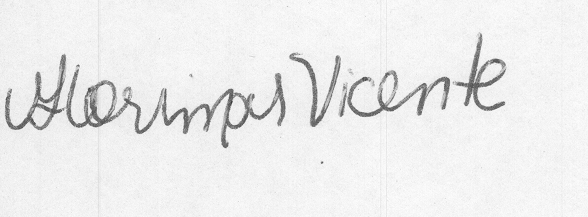

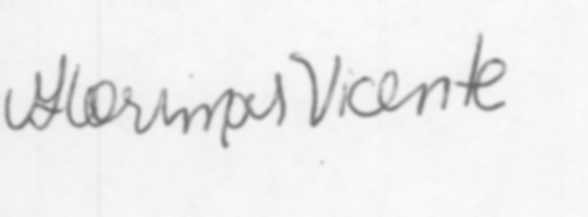

threshold:  206.0


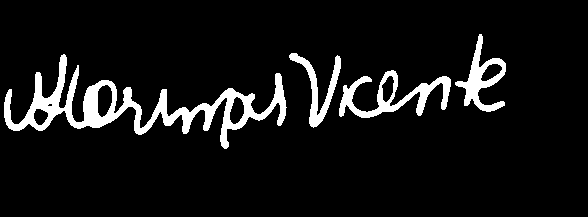

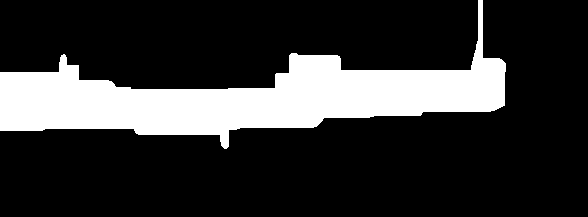

numbers of contours:  1


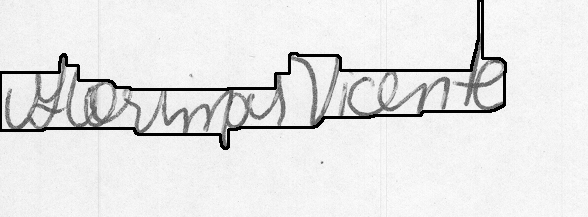

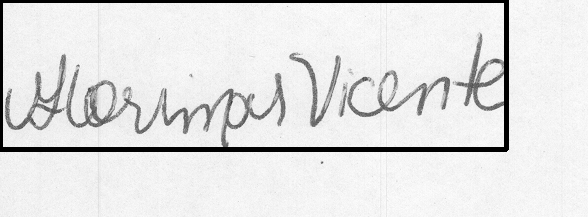

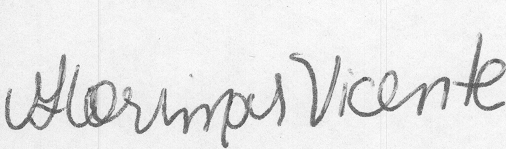

(150, 300)


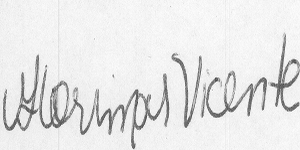

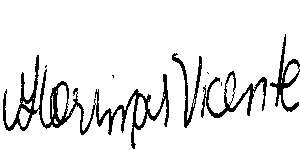

In [13]:
path = path_datasets + "1.png"
preprocessor_img(path, image_shape)